In [13]:
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

In [3]:
file_path = 'wdbc.data'
columns = ['id', 'diagnosis', '1', '2', '3', '4', '5', '6', '7', '8', '9',
           '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
           '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
# above .data file is comma delimited
breast_cancer_df = pd.read_csv(file_path, sep=",", header=None, names=columns)

In [4]:
features = breast_cancer_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                             '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                             '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']]

labels = breast_cancer_df[['diagnosis']]

In [5]:
# How to apply a function to every row
# df["preprocessing"] = df["preprocessing"].apply(removePunctuation)

# Replace values of every row
# df["text"] = df["text"].replace(to_replace = "@[A-Za-z0-9_]*", value = "", regex = True)

# Change labels from 2, 4 to 0, 1
def transform_zero_one(label):
    return 0 if label == 'B' else 1

labels['diagnosis'] = labels['diagnosis'].apply(transform_zero_one)
labels

<ipython-input-5-dddca3c11bd7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['diagnosis'] = labels['diagnosis'].apply(transform_zero_one)


,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [6]:
# Aplly Normalization to values of the features
def normalize_features(feature):
    return (scale*((float(feature)-min_value)/(max_value-min_value)))+new_min
   

for column in features:
    new_max = 0.5
    new_min = -0.5
    max_value = features[column].max()
    min_value = features[column].min()
    scale = new_max - new_min
    features[column] = features[column].apply(normalize_features)

features

<ipython-input-6-b22f421f6e55>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = features[column].apply(normalize_features)


,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.021037,-0.477342,0.045989,-0.136267,0.093753,0.292037,0.203140,0.231113,0.186364,0.105518,...,0.120776,-0.358475,0.168310,-0.049302,0.101136,0.119292,0.068610,0.412027,0.098462,-0.081136
1,0.143144,-0.227426,0.115783,0.001591,-0.210120,-0.318232,-0.296392,-0.151243,-0.120202,-0.358677,...,0.106901,-0.196429,0.039818,-0.064786,-0.152447,-0.345437,-0.307029,0.139175,-0.266410,-0.277122
2,0.101496,-0.109740,0.095743,-0.050583,0.014309,-0.068983,-0.037488,0.135686,0.009596,-0.288753,...,0.056386,-0.139925,0.008442,-0.125492,-0.016410,-0.114625,-0.140256,0.335052,-0.096294,-0.286567
3,-0.289910,-0.139161,-0.266499,-0.397094,0.311321,0.311361,0.065604,0.022863,0.276263,0.500000,...,-0.251690,-0.114072,-0.258653,-0.405992,0.415472,0.314012,0.048642,0.384880,0.500000,0.273711
4,0.129893,-0.343422,0.130986,-0.010710,-0.069649,-0.152107,-0.036082,0.018390,-0.121717,-0.313184,...,0.019744,-0.376066,0.006948,-0.158425,-0.062636,-0.327585,-0.180511,0.058419,-0.342500,-0.357405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.190000,-0.071187,0.178668,0.066490,0.026948,-0.203945,0.071462,0.190358,-0.163636,-0.367944,...,0.123266,-0.116738,0.076174,-0.047336,-0.038863,-0.321473,-0.171965,0.261512,-0.402425,-0.394333
565,0.122320,0.126987,0.104036,-0.025981,-0.092218,-0.242286,-0.162605,-0.013370,-0.150505,-0.386900,...,0.060655,0.199094,0.020892,-0.120085,-0.199993,-0.340003,-0.243211,0.059450,-0.301498,-0.425685
566,-0.044749,0.121238,-0.054212,-0.196882,-0.211835,-0.245660,-0.283247,-0.236481,-0.232323,-0.362679,...,-0.106901,0.089019,-0.120051,-0.269269,-0.217823,-0.226295,-0.228195,-0.012715,-0.371279,-0.348091
567,0.144564,0.163510,0.165538,-0.024284,0.088336,0.290197,0.323336,0.255467,0.175253,-0.074558,...,0.133582,0.230277,0.168310,-0.097965,0.119626,0.315758,0.249760,0.410653,-0.002858,-0.047685


In [11]:
test_percent = 10
train_samples_qt = int((breast_cancer_df.shape[0])*((100-test_percent)/100))

x_train = features[:][:train_samples_qt]
y_train = labels[:][:train_samples_qt]
x_test = features[:][train_samples_qt:]
y_test = labels[:][train_samples_qt:]


(569, 30)

In [14]:
num_classes = 2
input_shape = (30,)

# Transformando os rótulos em vetores das classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="softmax")
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 6,274
Trainable params: 6,274
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 125
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
4/4 [==============================] - 0s 54ms/step - loss: 0.6662 - accuracy: 0.5813 - val_loss: 0.5316 - val_accuracy: 0.7692
Epoch 2/15
4/4 [==============================] - 0s 9ms/step - loss: 0.5896 - accuracy: 0.6103 - val_loss: 0.4631 - val_accuracy: 0.7692
Epoch 3/15
4/4 [==============================] - 0s 9ms/step - loss: 0.5479 - accuracy: 0.6098 - val_loss: 0.4255 - val_accuracy: 0.7885
Epoch 4/15
4/4 [==============================] - 0s 10ms/step - loss: 0.5162 - accuracy: 0.6506 - val_loss: 0.4039 - val_accuracy: 0.8462
Epoch 5/15
4/4 [==============================] - 0s 12ms/step - loss: 0.4706 - accuracy: 0.7503 - val_loss: 0.3853 - val_accuracy: 0.9423
Epoch 6/15
4/4 [==============================] - 0s 12ms/step - loss: 0.4364 - accuracy: 0.8409 - val_loss: 0.3719 - val_accuracy: 0.9615
Epoch 7/15
4/4 [==============================] - 0s 13ms/step - loss: 0.3854 - accuracy: 0.8830 - val_loss: 0.3374 - val_accuracy: 0.9615
Epoch 8/15
4/4 [=============

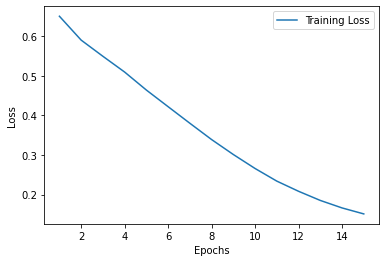

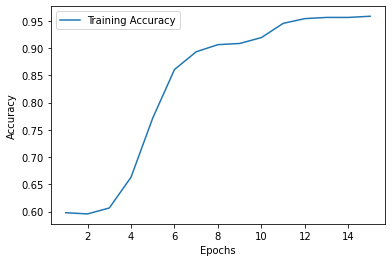

Test
Loss: 0.12313157320022583
Accuracy: 0.9649122953414917
[[0.14768887 0.85231113]
 [0.762116   0.23788397]
 [0.5640572  0.43594283]
 [0.940189   0.05981101]
 [0.03307837 0.9669216 ]
 [0.02323474 0.97676533]
 [0.82691854 0.1730815 ]
 [0.8814461  0.11855388]
 [0.95682126 0.04317872]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [20]:
loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values)+1)

pyplot.plot(epochs, loss_values, label='Training Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()

pyplot.show()

pyplot.plot(epochs, accuracy_values, label='Training Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()

pyplot.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test\nLoss: {}\nAccuracy: {}'.format(score[0], score[1]))

predictions = model.predict(x_test[:9])
print(predictions)
print(y_test[:9])